In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('costs_both.csv')

In [3]:
df

Model id  Region id       cost
0            1.0        1.0  24.953121
1            1.0        1.0  23.785084
2            1.0        1.0  22.811177
3            1.0        1.0  29.283847
4            1.0        1.0  27.992041
...          ...        ...        ...
141735       4.0        4.0  14.769500
141736       4.0        4.0  11.643729
141737       4.0        4.0  16.068485
141738       4.0        4.0  13.149129
141739       4.0        4.0  16.131869

[141740 rows x 3 columns]

In [4]:
#thresholds = [30, 20, 18, 17]
thresholds = [30, 20, 20, 20]

In [5]:
df_comp = pd.DataFrame(columns =['Model id', 'Region id', 'compatible'])

for model_id in range(1,5):
    threshold = thresholds[model_id-1]
    for region_id in range(1,5):
        n = df[(df['Model id']== model_id) & (df['Region id']== region_id)].shape[0]
        comp = df[(df['Model id']== model_id) & (df['Region id']== region_id) & (df['cost'] <= threshold)].shape[0]
        df_comp = df_comp.append({'Model id': model_id, 'Region id': region_id, 'compatible': comp/n}, ignore_index=True)
        
        

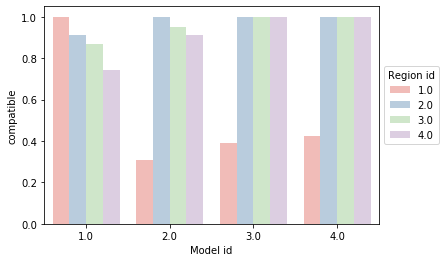

In [6]:
sns.barplot(x = 'Model id', y = 'compatible', data = df_comp, hue="Region id", palette="Pastel1")
ax = plt.gca()
l = ax.get_legend()
l.set_bbox_to_anchor((1, 0.75))
plt.show()

In [7]:
for i in range(1,5):
    df.drop(index=df[((df['Model id']==i) & (df['Region id']==i) & (df['cost'] > thresholds[i-1]))].index, inplace=True)

In [8]:
for i in range(1,5):
    print(df[(df['Model id']==i) & (df['Region id']==i) & (df['cost'] > thresholds[i-1])])

Empty DataFrame
Columns: [Model id, Region id, cost]
Index: []
Empty DataFrame
Columns: [Model id, Region id, cost]
Index: []
Empty DataFrame
Columns: [Model id, Region id, cost]
Index: []
Empty DataFrame
Columns: [Model id, Region id, cost]
Index: []


In [42]:
df.to_csv('costs_both_2.csv', index=False)

Model id  Region id       cost
0            1.0        1.0  24.953121
1            1.0        1.0  23.785084
2            1.0        1.0  22.811177
3            1.0        1.0  29.283847
4            1.0        1.0  27.992041
...          ...        ...        ...
141735       4.0        4.0  14.769500
141736       4.0        4.0  11.643729
141737       4.0        4.0  16.068485
141738       4.0        4.0  13.149129
141739       4.0        4.0  16.131869

[141735 rows x 3 columns]

In [140]:
df[(df['Model id']==3) & (df['Region id']==4)].shape

(9124, 3)

In [141]:
1/9124

0.00010960105217010084